In [1]:
import numpy as np 
import pandas as pd 

from src.utils import mkdir
from src.logger import init_logger
from src.builtin.estimators import TabNetClassifier
from sklearn.datasets import load_breast_cancer

## init logger

In [2]:
logger_dir = 'logs'
logger_name = 'TEST'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## load data

In [3]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Build Model

In [4]:
tabnet = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=4, atten_dims=4, num_steps=4, num_indep=2, num_shared=1
)

In [5]:
tabnet.build(path='zzzzz')

[Errno 2] No such file or directory: 'zzzzz'


[2021-01-26 22:13:55,616][WARNING][TabNet] Failed to load model from zzzzz


TabNetClassifier(atten_dims=4, input_dims=30, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_shared=1, num_steps=4,
                 output_dims=[1], reprs_dims=4)

In [6]:
tabnet.fit(X, y.reshape(-1, 1), batch_size=512, metrics=['acc'], max_epochs=200)

[2021-01-26 22:13:55,627][WARNING][TabNet] use default optimizer
[2021-01-26 22:13:55,629][WARNING][TabNet] use default optimizer params
[2021-01-26 22:13:55,630][INFO][TabNet] start training.
[2021-01-26 22:13:55,630][INFO][TabNet] ******************** epoch : 1 ********************
[2021-01-26 22:13:58,949][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:13:58,950][INFO][TabNet] total_loss : 0.7279744744300842
[2021-01-26 22:13:58,951][INFO][TabNet] task_loss : 0.7267061471939087
[2021-01-26 22:13:58,952][INFO][TabNet] mask_loss : -1.2683196067810059
[2021-01-26 22:13:58,953][INFO][TabNet] time_cost : 0.9086718559265137
[2021-01-26 22:13:58,953][INFO][TabNet] accuracy : 0.578125
[2021-01-26 22:13:58,954][INFO][TabNet] ******************** epoch : 2 ********************
[2021-01-26 22:14:01,411][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:14:01,412][INFO][TabNet] total_loss : 0.698481023311615
[2021-01-26 22:14:01

[2021-01-26 22:14:33,717][INFO][TabNet] ******************** epoch : 16 ********************
[2021-01-26 22:14:36,158][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:14:36,159][INFO][TabNet] total_loss : 0.6705868244171143
[2021-01-26 22:14:36,160][INFO][TabNet] task_loss : 0.6693346500396729
[2021-01-26 22:14:36,161][INFO][TabNet] mask_loss : -1.2521528005599976
[2021-01-26 22:14:36,162][INFO][TabNet] time_cost : 0.05882596969604492
[2021-01-26 22:14:36,163][INFO][TabNet] accuracy : 0.64453125
[2021-01-26 22:14:36,163][INFO][TabNet] ******************** epoch : 17 ********************
[2021-01-26 22:14:38,602][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:14:38,603][INFO][TabNet] total_loss : 0.6689955592155457
[2021-01-26 22:14:38,604][INFO][TabNet] task_loss : 0.6677402257919312
[2021-01-26 22:14:38,605][INFO][TabNet] mask_loss : -1.2553119659423828
[2021-01-26 22:14:38,605][INFO][TabNet] time_cost : 0.0588307380

[2021-01-26 22:15:13,067][INFO][TabNet] total_loss : 0.6209064722061157
[2021-01-26 22:15:13,068][INFO][TabNet] task_loss : 0.6196388006210327
[2021-01-26 22:15:13,068][INFO][TabNet] mask_loss : -1.267676591873169
[2021-01-26 22:15:13,069][INFO][TabNet] time_cost : 0.06482577323913574
[2021-01-26 22:15:13,070][INFO][TabNet] accuracy : 0.72265625
[2021-01-26 22:15:13,071][INFO][TabNet] ******************** epoch : 32 ********************
[2021-01-26 22:15:15,614][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:15:15,615][INFO][TabNet] total_loss : 0.6352548599243164
[2021-01-26 22:15:15,615][INFO][TabNet] task_loss : 0.6339864134788513
[2021-01-26 22:15:15,616][INFO][TabNet] mask_loss : -1.2684534788131714
[2021-01-26 22:15:15,617][INFO][TabNet] time_cost : 0.05970144271850586
[2021-01-26 22:15:15,617][INFO][TabNet] accuracy : 0.7109375
[2021-01-26 22:15:15,618][INFO][TabNet] ******************** epoch : 33 ********************
[2021-01-26 22:15:18,052]

[2021-01-26 22:15:50,214][INFO][TabNet] time_cost : 0.05886960029602051
[2021-01-26 22:15:50,214][INFO][TabNet] accuracy : 0.748046875
[2021-01-26 22:15:50,215][INFO][TabNet] ******************** epoch : 47 ********************
[2021-01-26 22:15:52,660][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:15:52,661][INFO][TabNet] total_loss : 0.6023563742637634
[2021-01-26 22:15:52,662][INFO][TabNet] task_loss : 0.60109543800354
[2021-01-26 22:15:52,662][INFO][TabNet] mask_loss : -1.26091730594635
[2021-01-26 22:15:52,663][INFO][TabNet] time_cost : 0.05784320831298828
[2021-01-26 22:15:52,664][INFO][TabNet] accuracy : 0.73046875
[2021-01-26 22:15:52,664][INFO][TabNet] ******************** epoch : 48 ********************
[2021-01-26 22:15:55,116][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:15:55,117][INFO][TabNet] total_loss : 0.5534182190895081
[2021-01-26 22:15:55,118][INFO][TabNet] task_loss : 0.5521770119667053
[2021

[2021-01-26 22:16:29,835][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:16:29,836][INFO][TabNet] total_loss : 0.5066053867340088
[2021-01-26 22:16:29,837][INFO][TabNet] task_loss : 0.5053606629371643
[2021-01-26 22:16:29,837][INFO][TabNet] mask_loss : -1.244736671447754
[2021-01-26 22:16:29,838][INFO][TabNet] time_cost : 0.05712461471557617
[2021-01-26 22:16:29,838][INFO][TabNet] accuracy : 0.796875
[2021-01-26 22:16:29,839][INFO][TabNet] ******************** epoch : 63 ********************
[2021-01-26 22:16:32,291][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:16:32,292][INFO][TabNet] total_loss : 0.5207421183586121
[2021-01-26 22:16:32,293][INFO][TabNet] task_loss : 0.519492506980896
[2021-01-26 22:16:32,294][INFO][TabNet] mask_loss : -1.24961519241333
[2021-01-26 22:16:32,294][INFO][TabNet] time_cost : 0.05926942825317383
[2021-01-26 22:16:32,295][INFO][TabNet] accuracy : 0.806640625
[2021-01-26 22:16:32,295][IN

[2021-01-26 22:17:07,077][INFO][TabNet] mask_loss : -1.2403194904327393
[2021-01-26 22:17:07,077][INFO][TabNet] time_cost : 0.05784106254577637
[2021-01-26 22:17:07,078][INFO][TabNet] accuracy : 0.837890625
[2021-01-26 22:17:07,078][INFO][TabNet] ******************** epoch : 78 ********************
[2021-01-26 22:17:09,549][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:17:09,550][INFO][TabNet] total_loss : 0.5043447613716125
[2021-01-26 22:17:09,551][INFO][TabNet] task_loss : 0.5031055808067322
[2021-01-26 22:17:09,551][INFO][TabNet] mask_loss : -1.2391939163208008
[2021-01-26 22:17:09,552][INFO][TabNet] time_cost : 0.06080937385559082
[2021-01-26 22:17:09,552][INFO][TabNet] accuracy : 0.806640625
[2021-01-26 22:17:09,553][INFO][TabNet] ******************** epoch : 79 ********************
[2021-01-26 22:17:12,028][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:17:12,029][INFO][TabNet] total_loss : 0.4582925438880920

[2021-01-26 22:17:44,431][INFO][TabNet] ******************** epoch : 93 ********************
[2021-01-26 22:17:46,924][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:17:46,926][INFO][TabNet] total_loss : 0.468710333108902
[2021-01-26 22:17:46,926][INFO][TabNet] task_loss : 0.46748533844947815
[2021-01-26 22:17:46,927][INFO][TabNet] mask_loss : -1.224993348121643
[2021-01-26 22:17:46,927][INFO][TabNet] time_cost : 0.06089377403259277
[2021-01-26 22:17:46,929][INFO][TabNet] accuracy : 0.833984375
[2021-01-26 22:17:46,929][INFO][TabNet] ******************** epoch : 94 ********************
[2021-01-26 22:17:49,412][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:17:49,413][INFO][TabNet] total_loss : 0.47333118319511414
[2021-01-26 22:17:49,414][INFO][TabNet] task_loss : 0.47209614515304565
[2021-01-26 22:17:49,414][INFO][TabNet] mask_loss : -1.2350448369979858
[2021-01-26 22:17:49,414][INFO][TabNet] time_cost : 0.05886507

[2021-01-26 22:18:23,960][INFO][TabNet] total_loss : 0.39457815885543823
[2021-01-26 22:18:23,961][INFO][TabNet] task_loss : 0.3933311700820923
[2021-01-26 22:18:23,962][INFO][TabNet] mask_loss : -1.246984839439392
[2021-01-26 22:18:23,962][INFO][TabNet] time_cost : 0.057793378829956055
[2021-01-26 22:18:23,963][INFO][TabNet] accuracy : 0.87890625
[2021-01-26 22:18:23,963][INFO][TabNet] ******************** epoch : 109 ********************
[2021-01-26 22:18:26,433][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:18:26,434][INFO][TabNet] total_loss : 0.4031137228012085
[2021-01-26 22:18:26,435][INFO][TabNet] task_loss : 0.40190404653549194
[2021-01-26 22:18:26,435][INFO][TabNet] mask_loss : -1.2096645832061768
[2021-01-26 22:18:26,436][INFO][TabNet] time_cost : 0.058866024017333984
[2021-01-26 22:18:26,437][INFO][TabNet] accuracy : 0.859375
[2021-01-26 22:18:26,437][INFO][TabNet] ******************** epoch : 110 ********************
[2021-01-26 22:18:28

[2021-01-26 22:19:01,061][INFO][TabNet] time_cost : 0.057845115661621094
[2021-01-26 22:19:01,062][INFO][TabNet] accuracy : 0.87109375
[2021-01-26 22:19:01,063][INFO][TabNet] ******************** epoch : 124 ********************
[2021-01-26 22:19:03,504][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:19:03,505][INFO][TabNet] total_loss : 0.3765029311180115
[2021-01-26 22:19:03,505][INFO][TabNet] task_loss : 0.3752760887145996
[2021-01-26 22:19:03,506][INFO][TabNet] mask_loss : -1.2268550395965576
[2021-01-26 22:19:03,506][INFO][TabNet] time_cost : 0.060837507247924805
[2021-01-26 22:19:03,507][INFO][TabNet] accuracy : 0.869140625
[2021-01-26 22:19:03,507][INFO][TabNet] ******************** epoch : 125 ********************
[2021-01-26 22:19:05,947][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:19:05,948][INFO][TabNet] total_loss : 0.37748631834983826
[2021-01-26 22:19:05,948][INFO][TabNet] task_loss : 0.3762903213500

[2021-01-26 22:19:38,317][INFO][TabNet] ******************** epoch : 139 ********************
[2021-01-26 22:19:40,753][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:19:40,754][INFO][TabNet] total_loss : 0.33271530270576477
[2021-01-26 22:19:40,754][INFO][TabNet] task_loss : 0.33155661821365356
[2021-01-26 22:19:40,755][INFO][TabNet] mask_loss : -1.158682107925415
[2021-01-26 22:19:40,755][INFO][TabNet] time_cost : 0.0598301887512207
[2021-01-26 22:19:40,756][INFO][TabNet] accuracy : 0.888671875
[2021-01-26 22:19:40,756][INFO][TabNet] ******************** epoch : 140 ********************
[2021-01-26 22:19:43,192][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:19:43,193][INFO][TabNet] total_loss : 0.3538201153278351
[2021-01-26 22:19:43,193][INFO][TabNet] task_loss : 0.35264351963996887
[2021-01-26 22:19:43,194][INFO][TabNet] mask_loss : -1.1765937805175781
[2021-01-26 22:19:43,194][INFO][TabNet] time_cost : 0.059865

[2021-01-26 22:20:17,677][INFO][TabNet] total_loss : 0.31761425733566284
[2021-01-26 22:20:17,678][INFO][TabNet] task_loss : 0.31643179059028625
[2021-01-26 22:20:17,678][INFO][TabNet] mask_loss : -1.182454228401184
[2021-01-26 22:20:17,679][INFO][TabNet] time_cost : 0.060830116271972656
[2021-01-26 22:20:17,679][INFO][TabNet] accuracy : 0.912109375
[2021-01-26 22:20:17,680][INFO][TabNet] ******************** epoch : 155 ********************
[2021-01-26 22:20:20,170][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:20:20,171][INFO][TabNet] total_loss : 0.29209059476852417
[2021-01-26 22:20:20,171][INFO][TabNet] task_loss : 0.29093223810195923
[2021-01-26 22:20:20,172][INFO][TabNet] mask_loss : -1.1583447456359863
[2021-01-26 22:20:20,172][INFO][TabNet] time_cost : 0.05984663963317871
[2021-01-26 22:20:20,173][INFO][TabNet] accuracy : 0.91015625
[2021-01-26 22:20:20,173][INFO][TabNet] ******************** epoch : 156 ********************
[2021-01-26 22:2

[2021-01-26 22:20:55,266][INFO][TabNet] mask_loss : -1.1641008853912354
[2021-01-26 22:20:55,266][INFO][TabNet] time_cost : 0.0678412914276123
[2021-01-26 22:20:55,267][INFO][TabNet] accuracy : 0.904296875
[2021-01-26 22:20:55,268][INFO][TabNet] ******************** epoch : 170 ********************
[2021-01-26 22:20:57,778][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:20:57,779][INFO][TabNet] total_loss : 0.3163841664791107
[2021-01-26 22:20:57,779][INFO][TabNet] task_loss : 0.3152146339416504
[2021-01-26 22:20:57,780][INFO][TabNet] mask_loss : -1.1695330142974854
[2021-01-26 22:20:57,780][INFO][TabNet] time_cost : 0.05983448028564453
[2021-01-26 22:20:57,781][INFO][TabNet] accuracy : 0.892578125
[2021-01-26 22:20:57,781][INFO][TabNet] ******************** epoch : 171 ********************
[2021-01-26 22:21:00,242][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:21:00,243][INFO][TabNet] total_loss : 0.279535502195358

[2021-01-26 22:21:32,912][INFO][TabNet] accuracy : 0.912109375
[2021-01-26 22:21:32,912][INFO][TabNet] ******************** epoch : 185 ********************
[2021-01-26 22:21:35,451][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:21:35,452][INFO][TabNet] total_loss : 0.28251582384109497
[2021-01-26 22:21:35,453][INFO][TabNet] task_loss : 0.28137069940567017
[2021-01-26 22:21:35,454][INFO][TabNet] mask_loss : -1.145119071006775
[2021-01-26 22:21:35,454][INFO][TabNet] time_cost : 0.05987071990966797
[2021-01-26 22:21:35,455][INFO][TabNet] accuracy : 0.90625
[2021-01-26 22:21:35,455][INFO][TabNet] ******************** epoch : 186 ********************
[2021-01-26 22:21:37,987][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:21:37,988][INFO][TabNet] total_loss : 0.2682637572288513
[2021-01-26 22:21:37,989][INFO][TabNet] task_loss : 0.2671332061290741
[2021-01-26 22:21:37,989][INFO][TabNet] mask_loss : -1.130553960800171
[2

[2021-01-26 22:22:14,303][INFO][TabNet] -------------------- train info --------------------
[2021-01-26 22:22:14,304][INFO][TabNet] total_loss : 0.2659071981906891
[2021-01-26 22:22:14,305][INFO][TabNet] task_loss : 0.264784038066864
[2021-01-26 22:22:14,305][INFO][TabNet] mask_loss : -1.1231595277786255
[2021-01-26 22:22:14,306][INFO][TabNet] time_cost : 0.08779573440551758
[2021-01-26 22:22:14,306][INFO][TabNet] accuracy : 0.919921875
[2021-01-26 22:22:14,307][INFO][TabNet] training complete.
[2021-01-26 22:22:14,308][INFO][TabNet] ******************** Summary Info ********************


In [7]:
m_explain, masks = tabnet.explain(X)

In [8]:
m_explain.size()

torch.Size([512, 30])

In [9]:
m_explain[0, ...]

tensor([0.0000, 0.0000, 0.1056, 0.0000, 0.0000, 0.0000, 0.0000, 2.2965, 0.1575,
        0.0000, 0.0105, 0.1334, 0.0556, 0.0000, 0.0000, 0.0000, 0.1152, 0.3430,
        0.6227, 0.0000, 0.0000, 0.0570, 1.0023, 0.0000, 0.0000, 0.0634, 0.3141,
        0.0000, 0.0000, 0.0206], device='cuda:0')

In [10]:
m_explain[1, ...]

tensor([1.2728, 0.0000, 0.6932, 0.0000, 0.0000, 0.1962, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5814, 0.5406, 0.0000,
        0.0000, 0.0000, 0.8675, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.8407, 0.0000, 0.3546], device='cuda:0')

In [11]:
m_explain[2, ...]

tensor([0.5186, 0.0000, 0.1009, 0.0000, 0.3491, 0.0659, 0.0000, 2.0697, 0.2154,
        0.0000, 0.0955, 0.3996, 0.0000, 0.2295, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.6857, 0.1564, 0.7877, 0.0148, 0.3355,
        0.0000, 0.0000, 0.0000], device='cuda:0')

In [13]:
import matplotlib.pyplot as plt

[2021-01-26 22:22:17,851][INFO]Generating new fontManager, this may take some time...


Text(0.5, 1.0, 'importance')

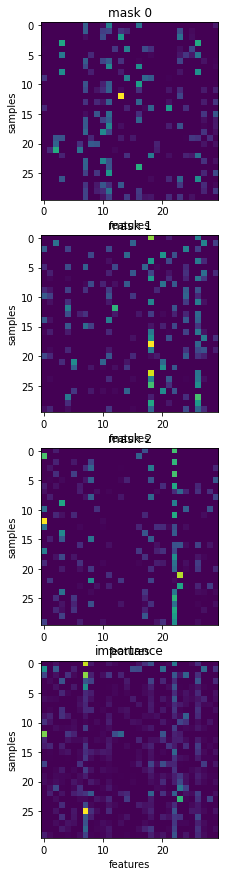

In [35]:
fig, axs = plt.subplots(4, 1, figsize=(15,15))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:30])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")

axs[3].imshow(m_explain.cpu().numpy()[:30, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')

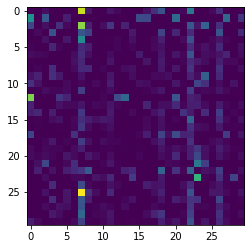

In [29]:
plt.imshow(m_explain.cpu().numpy()[:30, :])

In [16]:
from scipy.sparse import csc_matrix
import scipy

In [17]:
create_explain_matrix(30, [], [], 30)

NameError: name 'create_explain_matrix' is not defined

In [ ]:
def create_explain_matrix(input_dim, cat_emb_dim, cat_idxs, post_embed_dim):
    """
    This is a computational trick.
    In order to rapidly sum importances from same embeddings
    to the initial index.
    Parameters
    ----------
    input_dim : int
        Initial input dim
    cat_emb_dim : int or list of int
        if int : size of embedding for all categorical feature
        if list of int : size of embedding for each categorical feature
    cat_idxs : list of int
        Initial position of categorical features
    post_embed_dim : int
        Post embedding inputs dimension
    Returns
    -------
    reducing_matrix : np.array
        Matrix of dim (post_embed_dim, input_dim)  to performe reduce
    """

    if isinstance(cat_emb_dim, int):
        all_emb_impact = [cat_emb_dim - 1] * len(cat_idxs)
    else:
        all_emb_impact = [emb_dim - 1 for emb_dim in cat_emb_dim]

    acc_emb = 0
    nb_emb = 0
    indices_trick = []
    for i in range(input_dim):
        if i not in cat_idxs:
            indices_trick.append([i + acc_emb])
        else:
            indices_trick.append(
                range(i + acc_emb, i + acc_emb + all_emb_impact[nb_emb] + 1)
            )
            acc_emb += all_emb_impact[nb_emb]
            nb_emb += 1

    reducing_matrix = np.zeros((post_embed_dim, input_dim))
    for i, cols in enumerate(indices_trick):
        reducing_matrix[cols, i] = 1

    return scipy.sparse.csc_matrix(reducing_matrix)

In [ ]:
for key, value in masks.items():
                masks[key] = csc_matrix.dot(
                    value.cpu().detach().numpy(), self.reducing_matrix
                )

            res_explain.append(
                csc_matrix.dot(M_explain.cpu().detach().numpy(), self.reducing_matrix)
            )


In [ ]:
tabnet.predict(X)[0].reshape(-1)

In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 